## Testbank in one Set

Change your models in their definition and run the test

In [3]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.neymotin import iteration2

reload(iteration2)
Cell = iteration2.SPI6
Config = iteration2.Config

def CombinedTestBank():
    
    nsteps = 5
    
    ais = np.linspace(30,36,nsteps)
    synapses = np.linspace(25,7,nsteps)
    hmod = np.linspace(1,3,nsteps)

    def stepLayout(hmod, aisl, synapses):

        def HSoma():
            config = Config(h_somaModifier=float(hmod))
            return Cell(config)

        def AIS():
            config = Config(aisL = float(aisl))
            return Cell(config)

        def Synapses():
            config = Config(nsynapses=int(synapses))
            return Cell(config) 

        def Combined():
            config = Config(aisL =float(aisl),h_somaModifier=float(hmod), nsynapses=int(synapses))
            return Cell(config)

        return [HSoma, AIS, Synapses, Combined]
    
    return [ stepLayout(hmod[i],ais[i],synapses[i]) for i in range(nsteps)]
    
    

items = CombinedTestBank()



Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25


Cell with 36.0 µm AIS, hSoma 0.000422869314129 and 7


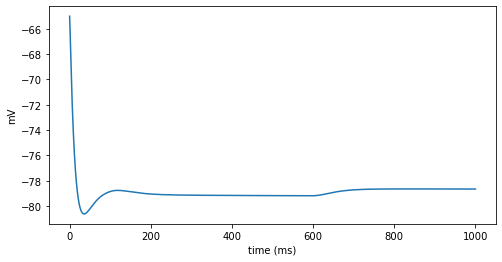

In [2]:
trace = generic.stimulate(items[4][3], {"dur":500, "delay": 100, "amp": 0}, synmodifier= 0.03, interval= 7)
generic.plotTrace(trace)

Cell with 30.0 µm AIS, hSoma 0.000140956438043 and 25


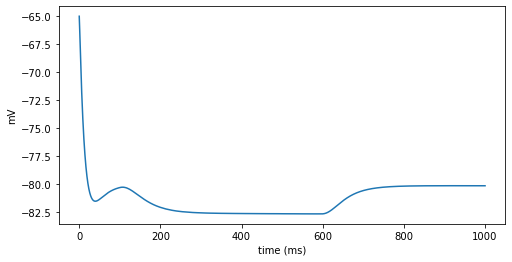

In [3]:
trace = generic.stimulate(items[0][3], {"dur":500, "delay": 100, "amp": 0}, synmodifier= 0.03, interval= 7)
generic.plotTrace(trace)

Cell with 36.0 µm AIS, hSoma 0.000422869314129 and 10
Cell with 36.0 µm AIS, hSoma 0.000422869314129 and 10
Cell with 36.0 µm AIS, hSoma 0.000422869314129 and 10
Cell with 36.0 µm AIS, hSoma 0.000422869314129 and 10


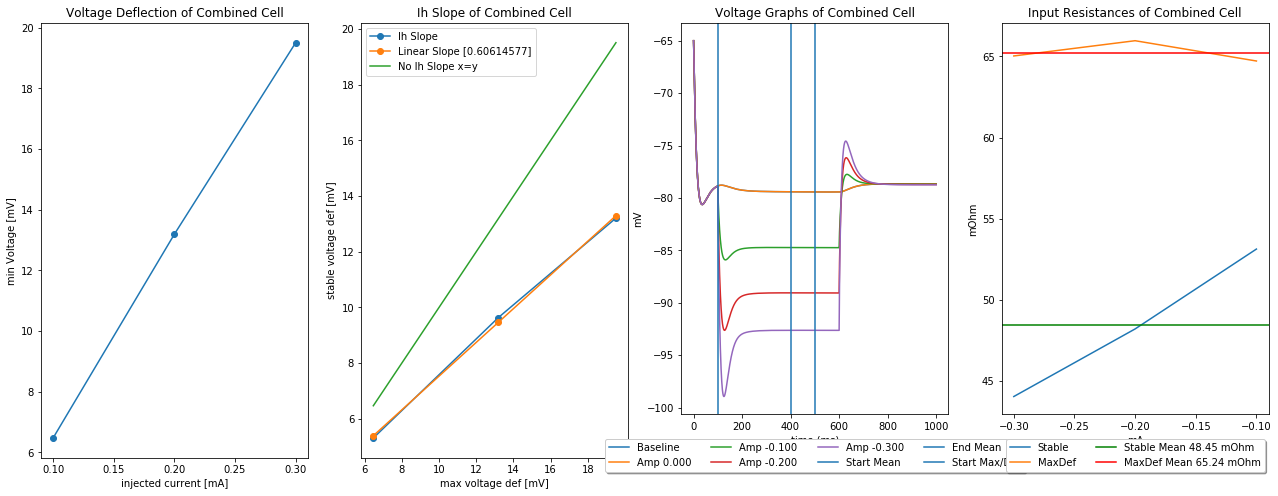

((48.44977179236591, 65.23733524674621),
 ([6.471643498927577, 13.193534640075569, 19.508369265175503],
  [5.312180714977444, 9.639489709235548, 13.209017904343668]))

In [17]:
ih.calculateInputResistanceAndIhSag(items[4][3],mult=-0.1, iterations=4 )

In [4]:
def testbank(*args, precisiondigits=4, apthreshold = 10):
    results = []
    for index, cellbuilder in enumerate(args):
        print(f"################ CELL {index} ####################")
        result = {}
        print(f'Calculating Rhoebase for {cellbuilder.__name__}')
        cell = cellbuilder()
        result["aisL"] = cell.c.aisL
        result["gbarIHSoma"] = cell.c.gbar_h_soma
        result["nsynapses"] = cell.c.nsynapses
        undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=precisiondigits, apthreshold = apthreshold, plot=False)# We have a different apc threshold here
        result["res"] = ih.calculateInputResistanceAndIhSag(cellbuilder,mult=-0.1, iterations=4 , plot=False)
        result["name"] = cellbuilder.__name__
        result["rheo"] = (undertrace, overtrace)
              
        print(f"Calculating RMP for {cellbuilder.__name__}")
        result["rmp"] = rmp.calculateRMP(cellbuilder, plot=False)
        result["ap-voltage"] = ap.calculateAPThresholdAndDerivative(overtrace)
        results.append(result)
        
    return results

In [5]:
results = []
for index, i in enumerate(items):
    print(f"------------------------ STEP {index} -------------------")
    print("---------------------------------------------------------")
    results.append(testbank(*i))

------------------------ STEP 0 -------------------
---------------------------------------------------------
################ CELL 0 ####################
Calculating Rhoebase for HSoma
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Detected first AP at 0.22000000000000008  [mA]
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 32.0 µm AIS, hSoma 0.000140956438043 and 25
Cell with 3

In [6]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

In [27]:
comprehensivelist = [{**cell["ap-voltage"], 
                      **cell["res"],
                      "cell": cell["name"],
                      "rheobase": cell["rheo"][1]["params"]["amp"],
                      "aisL": cell["aisL"],
                      "gbarIHSoma": cell["gbarIHSoma"],
                      "nsynapses": cell["nsynapses"],
                      "ih-slope": cell["res"]["ih_slope"][0],
                      "rmp": cell["rmp"], "step": index} 
                     for index, params in enumerate(results) for cell in params]
frame = pd.DataFrame.from_records(comprehensivelist)

In [28]:
frame.to_csv("dataset.csv")

In [21]:
frame.describe()

,apStartIndex,firstOver20Time,firstOver20Value,peakTime,peakValue,maxSlopeTime,maxSlopePoint,maxSlopeValue,hyperMaxTime,hyperMaxValue,...,AP Fall Time,AP HW,res_stablemean,res_maxmean,rheobase,aisL,gbarIHSoma,nsynapses,rmp,step
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,7943.350000,198.578786,-55.978545,199.013737,31.518727,198.814502,-2.121867,390.675495,213.393301,-85.336860,...,1.768695,1.158868,55.719765,65.708170,0.208018,32.500000,0.000211,20.400000,-81.609210,2.000000
std,446.000504,11.149734,0.211889,11.148579,0.060405,11.147213,3.037011,3.262116,11.079436,0.252665,...,0.015966,0.008926,4.107267,2.928278,0.003897,1.622214,0.000102,6.604624,1.020363,1.450953
min,7451.000000,186.270343,-56.563256,186.699987,31.370334,186.510294,-6.383411,384.212617,200.999560,-85.974029,...,1.749944,1.138205,47.519918,59.622423,0.197499,30.000000,0.000141,7.000000,-82.551078,0.000000
25%,7724.250000,193.101422,-56.096719,193.531237,31.499807,193.341544,-3.613105,388.779395,207.887052,-85.441777,...,1.749946,1.161736,52.233342,65.335070,0.205978,32.000000,0.000141,16.000000,-82.546724,1.000000
50%,7769.000000,194.220144,-55.996293,194.674986,31.518805,194.461111,-2.842299,391.919839,209.274547,-85.367097,...,1.774945,1.162471,58.548079,65.882223,0.209093,32.000000,0.000141,25.000000,-81.806759,2.000000
75%,7927.500000,198.182545,-55.790332,198.612487,31.564545,198.422794,-0.572901,393.048021,212.987052,-85.140411,...,1.774945,1.163206,58.642465,66.137449,0.210936,33.000000,0.000282,25.000000,-80.962520,3.000000
max,9248.000000,231.194220,-55.647797,231.624986,31.586800,231.435294,3.221081,394.824934,245.799539,-84.870267,...,1.799944,1.163206,59.078732,72.406622,0.212432,36.000000,0.000423,25.000000,-79.149802,4.000000


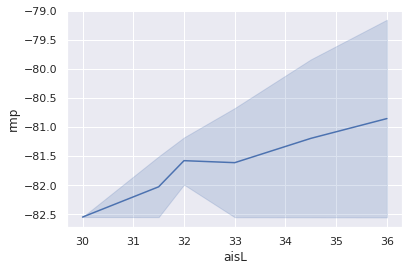

In [16]:
sns.lineplot(x="aisL", y="rmp",
             data=frame)

In [13]:
frame.columns

Index(['v', 't', 'aps', 'cellbuilder', 'params', 'v/t', 'apStartIndex',
       'firstOver20Time', 'firstOver20Value', 'peakTime', 'peakValue',
       'maxSlopeTime', 'maxSlopePoint', 'maxSlopeValue', 'hyperMaxTime',
       'hyperMaxValue', 'apEndIndex', 'Ap AHP', 'AP MaxSlope', 'midApUpTime',
       'midApUpValue', 'midApDownTime', 'midApDownValue', 'tenPercentUpValue',
       'tenPercentDownValue', 'ninetyPercentUpValue', 'ninetyPercentDownValue',
       'tenPercentUpTime', 'tenPercentDownTime', 'ninetyPercentUpTime',
       'ninetyPercentDownTime', 'AP Rise Time', 'AP Fall Time', 'AP HW',
       'res_stablemean', 'res_maxmean', 'ih_slope', 'cell', 'rheobase', 'aisL',
       'gbarIHSoma', 'nsynapses', 'rmp', 'step'],
      dtype='object')

In [67]:
frame.to_csv('out1003.zip')